In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Helper functions

In [256]:
def make_bump(size, center):
    assert(center < size)
    xs = np.linspace(np.pi/2, -3*np.pi/2, size, endpoint=False)
    bump = np.sin(xs)
    bump = np.roll(bump, center)
#     bump = bump/np.sum(np.abs(bump))
    return bump

In [243]:
def relu(X):
    return np.maximum(0, X)

In [244]:
from scipy.special import softmax

# Network initialization

In [136]:
n_spatial = 10
n_barcode = 10 # Must be >= n_spatial
n_cache = 3 # Three types

In [137]:
N = n_spatial + n_barcode + n_cache

In [288]:
J = np.zeros((N, N)) # (s,b,c) ordering
s_start = 0
s_end = n_spatial
b_start = s_end
b_end = b_start + n_barcode
c_start = b_end
c_end = -1
SEED = c_start
WATER = c_start + 1
WORM = c_start + 2

In [289]:
# W_ss is a ring attractor
# for i in range(n_spatial):
#     J[i, s_start:s_end] = make_bump(n_spatial, i)

In [290]:
# W_sb = W_bs.T as one-to-one connections
for i in range(n_spatial): # space to barcode
    J[ b_start+i, s_start+i] = 1
J[s_start:s_end, b_start:b_end] = J[b_start:b_end, s_start:s_end]

# Task-defined connections

In [291]:
# Many-to-one connections from barcode to cache type (W_bc)
seed_locs = [2, 5]
worm_locs = [4]
for l in seed_locs:
    J[b_start+l, SEED] = 1
    J[SEED, b_start+l] = 1
for l in worm_locs:
    J[b_start+l, WORM] = 1
    J[WORM, b_start+l] = 1

# Inputs

In [292]:
# Identify that the current location has a seed
i = np.zeros(N)
i[s_start:s_end] = make_bump(n_spatial, seed_locs[0])

In [293]:
# Identify the current location does not have a seed
i = np.zeros(N)
i[s_start:s_end] = make_bump(n_spatial, 0)

In [301]:
# Given current location and seed type, what's the spatial gradient?
i = np.zeros(N)
i[s_start:s_end] = make_bump(n_spatial, 0)
i[SEED] = 1

In [302]:
i = relu(i)

# Dynamics

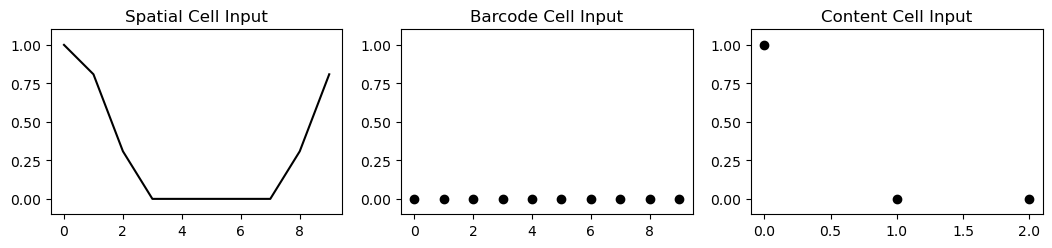

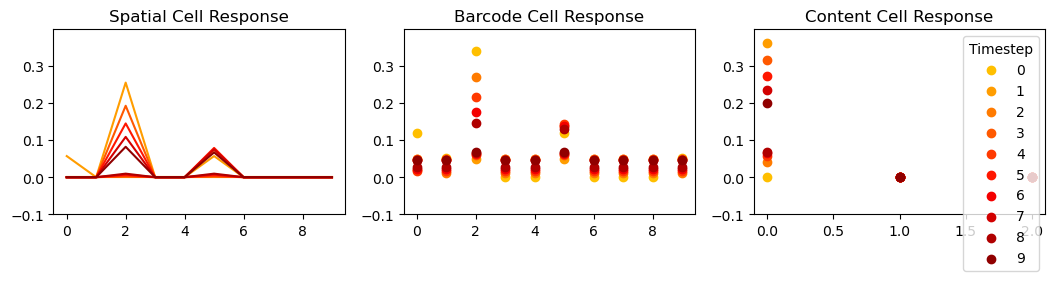

In [303]:
x = x_prev = np.zeros(N)
x_prev = i
fig, axs = plt.subplots(1, 3, figsize=(6.4*2, 4.8*0.5))
axs[0].plot(i[s_start:s_end], color='k')
axs[1].scatter(np.arange(n_barcode), i[b_start:b_end], color='k')
axs[2].scatter(np.arange(n_cache), i[c_start:], color='k')
axs[0].set_title('Spatial Cell Input')
axs[1].set_title('Barcode Cell Input')
axs[2].set_title('Content Cell Input')
for ax in axs:
    ax.set_ylim(-0.1, 1.1*np.max(i))
plt.show()

T = 10
fig, axs = plt.subplots(1, 3, figsize=(6.4*2, 4.8*0.5))
color = plt.cm.hot_r(np.linspace(0.35, 0.8, T))
all_x = []
for t in range(T):
    x = J@(0.9*x_prev)
    x[b_start:b_end] = softmax(x[b_start:b_end]*3)
    x = relu(x - 0.05)
    x_prev = x
    axs[0].plot(x[s_start:s_end], label=t, color=color[t])
    axs[1].scatter(np.arange(n_barcode), x[b_start:b_end], label=t, color=color[t])
    axs[2].scatter(np.arange(n_cache), x[c_start:], label=t, color=color[t])
    all_x.append(x)
axs[0].set_title('Spatial Cell Response')
axs[1].set_title('Barcode Cell Response')
axs[2].set_title('Content Cell Response')
for ax in axs:
    ax.set_ylim(-0.1, 1.1*np.max(all_x))
plt.legend(title='Timestep')
plt.show()

# Analysis

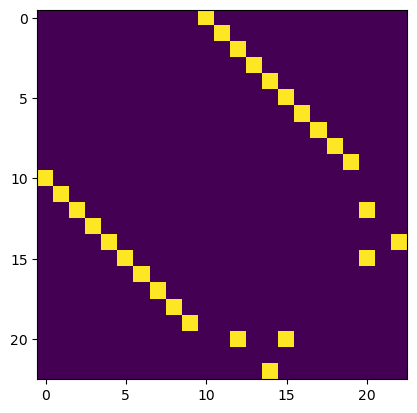

In [276]:
plt.figure()
plt.imshow(J)
plt.show()